In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# we can use the %matplotlib inline command before we create the line plot
%matplotlib inline

In [4]:
#Seaborn is a statistical plotting library in python. It has beautiful default styles
plt.style.use('seaborn')
import seaborn as sns
sns.set('notebook', style='darkgrid', font_scale=1.25)
 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3444\512063101.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
true_slope = 2.345

N = 7
#The numpy.linspace() function returns number spaces evenly ,
# # numpy.linspace(start,stop,num = 50,endpoint = True, retstep = False,dtype = None)
# -> start  : [optional] start of interval range. By default start = 0
# -> stop   : end of interval range
# -> restep : If True, return (samples, step). By default restep = False
# -> num    : [int, optional] No. of samples to generate
# -> dtype  : type of output array
x_N = np.linspace(-1, 1, N) # output-- array
y_N = true_slope * x_N

In [6]:
# Random module is used to generate random numbers in Python.
# Not actually random, rather this is used to generate pseudo-random numbers. 

# random_state simply sets a seed to the random generator,
# so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time.
prng = np.random.RandomState(33)

# random.RandomState.randn() Return a sample (or samples) from the “standard normal” distribution.
# input -- params --> int, optional , The dimensions of the returned array, should be all positive.
# If no argument is given a single Python float is returned
# output -- shaped array of floating-point samples from the standard normal distribution
ynoise_N = y_N + 0.7 * prng.randn(N)

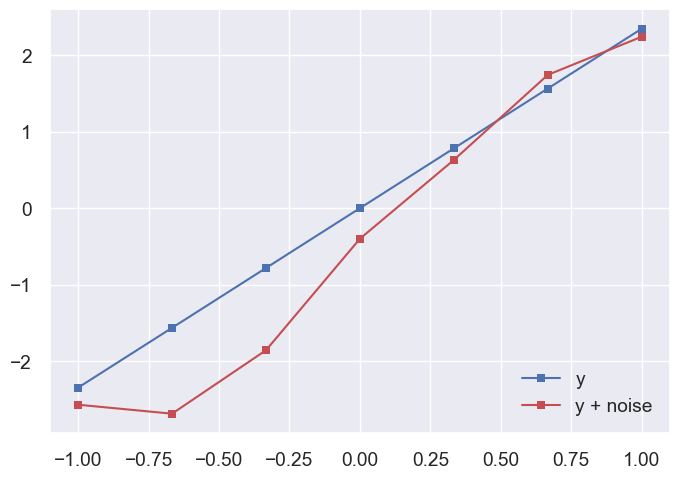

In [60]:
plt.plot(x_N, y_N, 'bs-', label='y')
plt.plot(x_N, ynoise_N, 'rs-', label='y + noise')
# A legend is an area describing the elements of the graph. In the matplotlib library, 
# there’s a function called legend() which is used to Place a legend on the axes.
# loc param refers to the location of legend
# Default value of loc is loc=”best” (upper left). The strings ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’
# place the legend at the corresponding corner of the axes/figure.
plt.legend(loc='lower right')

# Part 1: Simplest Linear Regression with 1-dim features and only slope

Estimate slope only. We assume the bias/intercept is fixed to zero.

Exact formula to estimate "least squares" solution w in 1D:
$$
w^* = \frac{\sum_n x_n y_n}{\sum_n x_n^2} = \frac{ \mathbf{x}^T \mathbf{y} }{ \mathbf{x}^T \mathbf{x} }
$$
 


In [8]:
# Estimate w using the 'true', noise-free y value
w_est = np.inner(x_N, y_N) / np.inner(x_N, x_N)
print(w_est)

2.3449999999999998


In [9]:
# Estimate w using the noisy y values
w_est = np.inner(x_N, ynoise_N) / np.inner(x_N, x_N)
print(w_est)

2.7606807490017067



# Exercise 1a: What if all examples had $x_n = 0$?

What would happen? What does the algebra of the formula suggest?

# Exercise 1b: Can you show graphically that this minimizes *mean squared error*?

In [10]:
def predict_1d(x_N, w):
    y = w*x_N
    return y

In [11]:
def calc_mean_squared_error(yhat_N, y_N):
    actual, pred = np.array(y_N), np.array(yhat_N)
    mse=np.square(np.subtract(actual,pred)).mean()
    return mse

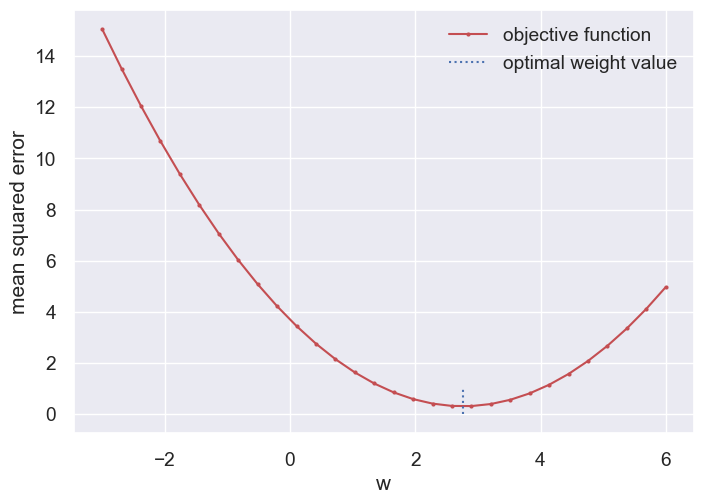

In [12]:
G = 30
w_candidates_G = np.linspace(-3, 6, G)
# np.zeros create an array all element of it are zeros
error_G = np.zeros(G)
# enumerate return the same list but each element replaced by a tuple hold two values (index, value)
for gg, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x_N, w)
    error_G[gg] = calc_mean_squared_error(yhat_N, ynoise_N)
# plot (x-axis,y-axis,color,label)
plt.plot(w_candidates_G, error_G, 'r.-', label='objective function');
# np.asarray () allows you to convert python data structures into NumPy array. You can convert list,
# list of list, tuple, or list of tuples into NumPy array
plt.plot(w_est * np.ones(2), np.asarray([0, 1]), 'b:', label='optimal weight value');
plt.xlabel('w');
plt.ylabel('mean squared error');
plt.legend()

# Exercise 1c: What about *mean absolute error*?

Does the least-squares estimate of $w$ minimize mean absolute error for this example?

In [13]:
def calc_mean_abs_error(yhat_N, y_N):
#     actual, pred = np.array(y_N), np.array(yhat_N)
#     sub=np.subtract(actual,pred)
#     mae=np.mean(sub)

    sum=0
    for i in range(len(yhat_N)):
        sum+=abs(y_N[i]-yhat_N[i])
    mae=sum/(len(yhat_N))       
    return mae
    

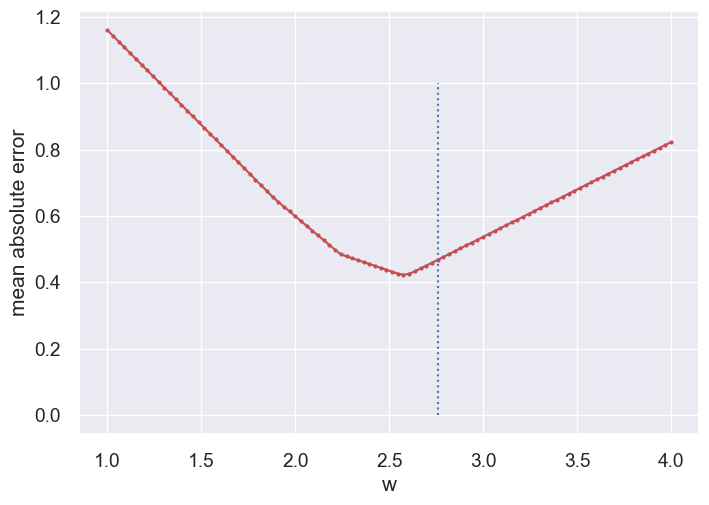

In [14]:
G = 100
w_candidates_G = np.linspace(1, 4, G)
error_G = np.zeros(G)
for gg, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x_N, w)
    error_G[gg] = calc_mean_abs_error(yhat_N, ynoise_N)
plt.plot(w_candidates_G, error_G, 'r.-', label='objective function');
plt.plot(w_est * np.ones(2), np.asarray([0, 1]), 'b:', label='optimal weight value');

plt.xlabel('w');
plt.ylabel('mean absolute error');

# Part 2: Simpler Linear Regression with slope and bias

Goal: estimate slope $w$ and bias $b$

Then the best estimates of the slope and intercept are given by:

$$
w^* = \frac{ \sum_{n=1}^N (x_n - \bar{x}) (y_n - \bar{y}) }{\sum_{n=1}^N (x_n - \bar{x})^2 }
$$

and

$$
b^* = \bar{y} - w^* \bar{x}
$$


### Using the 'true', noise-free y value

Sanity check : we should recover the true-slope, with zero intercept

In [15]:
xbar = np.mean(x_N)
ybar = np.mean(ynoise_N)

w_est = np.inner(x_N - xbar, ynoise_N - ybar) / np.inner(x_N - xbar, x_N - xbar)
b_est = ybar - w_est * xbar

print("Estimated slope: " + str(w_est))
print("Estimated bias: " + str(b_est))

Estimated slope: 2.7606807490017067
Estimated bias: -0.4138756764186623


# Part 3: General case of Linear Regression

Goal:
* estimate the vector $w \in \mathbb{R}^F$ of weight coefficients
* estimate the bias scalar $b$ (aka intercept)

# Given a dataset of $N$ examples and $F$ feature dimensions, where

* $\tilde{\mathbf{X}}$ is an $N \times F +1$ matrix of feature vectors, where we'll assume the last column is all ones
* $\mathbf{y}$ is an $N \times 1$ column vector of outputs

Remember that the formula is:
    
$$
\theta^* = (\tilde{\mathbf{X}}^T \tilde{\mathbf{X}} )^{-1} \tilde{\mathbf{X}}^T \mathbf{y}
\\
~\\
w^* = [\theta^*_1 ~ \theta^*_2 \ldots \theta^*_F ]^T
\\
~\\
b^* = \theta^*_{F+1}
$$

We need to compute a *matrix inverse* to do this.

Let's try this out. Step by step.

First, print out the $\tilde{X}$ array

In [16]:
x_N1 = x_N[:,np.newaxis]

In [17]:
xtilde_N2 = np.hstack([x_N1, np.ones((x_N.size, 1))])
print(xtilde_N2)

[[-1.          1.        ]
 [-0.66666667  1.        ]
 [-0.33333333  1.        ]
 [ 0.          1.        ]
 [ 0.33333333  1.        ]
 [ 0.66666667  1.        ]
 [ 1.          1.        ]]


Next, print out the $y$ array

In [18]:
print(ynoise_N)

[-2.56819745 -2.68541972 -1.85631918 -0.39928063  0.62995686  1.74174534
  2.24038504]


Next, lets compute the matrix product $\tilde{X}^T \tilde{X}$, which is a $2 \times 2$ matrix

In [19]:
xTx_22 = np.dot(xtilde_N2.T, xtilde_N2)
print(xTx_22)

[[ 3.11111111e+00 -2.22044605e-16]
 [-2.22044605e-16  7.00000000e+00]]


Next, lets compute the INVERSE of $\tilde{X}^T \tilde{X}$, which is again a $2 \times 2$ matrix

In [20]:
inv_xTx_22 = np.linalg.inv(xTx_22) # compute the inverse!
print(inv_xTx_22)

[[3.21428571e-01 1.01959257e-17]
 [1.01959257e-17 1.42857143e-01]]


Next, let's compute the optimal $\theta$ vector according to our formula above

In [21]:
theta_G = np.dot(inv_xTx_22, np.dot(xtilde_N2.T, ynoise_N[:,np.newaxis])) # compute theta vector
print(theta_G)

[[ 2.76068075]
 [-0.41387568]]


In [22]:
print("Estimated slope: " + str(theta_G[0]))
print("Estimated bias: " + str(theta_G[1]))

Estimated slope: [2.76068075]
Estimated bias: [-0.41387568]


We should get the SAME results as in our simpler LR case in Part 2. 

So this formula for the general case looks super easy, right?

Not so fast...

Let's take a minute and review just what the heck an *inverse* is, before we just blindly implement this formula...

<a id="part4"></a>

# Part 4: Linear Algebra Review: What is the inverse of a matrix?

Let $A$ be a square matrix with shape $(D, D)$.

We say that matrix $A^{-1}$ is the *inverse* of $A$ if the product of $A$ and $A^{-1}$ yields the $D \times D$ *identity* matrix:

$$
A A^{-1} = I
$$

If $A^{-1}$ exists, it will also be a $D\times D $ square matrix.

In Python, we can compute the inverse of a matrix using `np.linalg.inv`

In [23]:
# Define a square matrix with shape(3,3)
A = np.diag(np.asarray([1., -2., 3.]))
print(A)

[[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  3.]]


In [24]:
# Compute its inverse
invA = np.linalg.inv(A)
print(invA)

[[ 1.          0.          0.        ]
 [-0.         -0.5        -0.        ]
 [ 0.          0.          0.33333333]]


In [25]:
np.dot(A, invA) # should equal identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Remember, in 1 dimensions, the inverse of $a$ is just $1/a$, since $a \cdot \frac{1}{a} = 1.0$

In [26]:
A = np.asarray([[2]])
print(A)

[[2]]


In [27]:
invA = np.linalg.inv(A)
print(invA)

[[0.5]]


## Does the inverse always exist?

No! Remember:

* Even when $D=1$, if $A=0$, then the inverse does not exist ($\frac{1}{A}$ is undefined)
* When $D \geq 2$, there are *infinitely many* square matrices $A$ that do not have an inverse



In [28]:
# Example 1:
A = np.asarray([[0, 0], [0, 1.337]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[0.    0.   ]
 [0.    1.337]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


In [29]:
# Example 2:
A = np.asarray([[3.4, 3.4], [3.4, 3.4]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[3.4 3.4]
 [3.4 3.4]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


In [30]:
# Example 3:
A = np.asarray([[-1.2, 4.7], [-2.4, 9.4]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[-1.2  4.7]
 [-2.4  9.4]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


What do these examples have in common???

The columns of $A$ are not linearly independent!

In other words, $A$ is not invertible whenever we can exactly construct one column of $A$ by a linear combination of other columns

$$
A_{:,D} = c_1 A_{:,1} + c_2 A_{:,2} + \ldots c_{D-1} A_{:,D-1}
$$

where $c_1$, $c_2$, $\ldots c_{D-1}$ are scalar weights.

In [31]:
# Look, here's the first column:
A[:, 0]

array([-1.2, -2.4])

In [32]:
# And here's it being perfectly reconstructed by a scalar times the second column
A[:, 1] * -1.2/4.7

array([-1.2, -2.4])

In [33]:
# Example 3:
A = np.asarray([[1.0, 2.0, -3.0], [2, 4, -6.0], [1.0, 1.0, 1.0]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[ 1.  2. -3.]
 [ 2.  4. -6.]
 [ 1.  1.  1.]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


### Important result from linear algebra: Invertible Matrix Theorem


Given a specific matrix $A$, the following statements are either *all* true or *all* false:

* $A$ has an inverse (e.g. a matrix $A^{-1}$ exists s.t. $A A^{-1} = I$)
* All $D$ columns of $A$ are linearly independent
* The columns of $A$ span the space $\mathbb{R}^D$
* $A$ has a non-zero determinant

For more implications, see the *Invertible Matrix Theorem*:

<https://en.wikipedia.org/wiki/Invertible_matrix#Properties>

<a id="part5"></a>

# Part 5: Is the numerical inverse reliable?

Can we always trust the results of `np.linalg.inv`?

Not really. Taking inverses is very tricky if the input matrix is not *very* well conditioned.

### A "good" example, where inverse works

In [34]:
# 3 indep rows of size 3.
x_NF = np.random.randn(3, 3)
xTx_FF = np.dot(x_NF.T, x_NF)

In [35]:
np.linalg.inv(np.dot(x_NF.T, x_NF))

array([[   32.18507987,  -115.65648728,   391.23262934],
       [ -115.65648728,   418.09445834, -1413.86122738],
       [  391.23262934, -1413.86122738,  4782.35185207]])

In [36]:
# First, verify the `inv` function computes *something* of the right shape

inv_xTx_FF = np.linalg.inv(xTx_FF)
print(inv_xTx_FF)

[[   32.18507987  -115.65648728   391.23262934]
 [ -115.65648728   418.09445834 -1413.86122738]
 [  391.23262934 -1413.86122738  4782.35185207]]


In [37]:
# Next, verify the `inv` function result is ACTUALLY the inverse

ans_FF = np.dot(xTx_FF, inv_xTx_FF)

print(ans_FF)
print("\nis this close enough to identity matrix? " + str(
    np.allclose(ans_FF, np.eye(3))))

[[ 1.00000000e+00  1.31532820e-13  1.76749946e-13]
 [ 1.21214011e-13  1.00000000e+00  3.14731286e-13]
 [-5.22890105e-14  2.40051529e-13  1.00000000e+00]]

is this close enough to identity matrix? True


### A *bad* example, where `np.linalg.inv` may be unreliable

In [38]:
# Only 2 indep rows of size 3. should NOT be invertible                      
# verify: determinant is close to zero                              
x_NF = np.random.randn(2, 3)  
xTx_FF = np.dot(x_NF.T, x_NF)

In [39]:
xTx_FF

array([[1.24784188, 2.57539594, 0.23628573],
       [2.57539594, 7.29175465, 0.4580327 ],
       [0.23628573, 0.4580327 , 0.04518628]])

In [40]:
# First, verify the `inv` function computes *something* of the right shape

inv_xTx_FF = np.linalg.inv(xTx_FF)
print(inv_xTx_FF)

LinAlgError: Singular matrix

In [41]:
# Next, verify the `inv` function result is ACTUALLY the inverse

ans_FF = np.dot(xTx_FF, inv_xTx_FF)

print(ans_FF)
print("\nis this close enough to identity matrix? " + str(
    np.allclose(ans_FF, np.eye(3))))

[[ -165.25667105   598.3625344  -2023.05452208]
 [ -581.25206881  2103.18629284 -7111.47674063]
 [  -27.69122954   100.2858218   -339.05528129]]

is this close enough to identity matrix? False


### What just happened?

We just asked for an inverse.

NumPy gave us a result that WAS NOT AN INVERSE, but we received NO WARNINGS OR ERRORS!

So what should we do? Avoid naively calling `np.linalg.inv` and trusting the result. 

A better thing to do is use `np.linalg.solve`, as this will be more *stable* (trustworthy).

<https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html>

What `np.linalg.solve(A, b)` does is that it uses DIFFERENT algorithm to directly return an answer to the question

What vector $\theta$ would be a valid solution to the equation

$$
A \theta = b
$$

for some matrix $A$ and vector $b$

So for our case, we are requesting a solution (a specific vector $\theta$) to the equation

$$
\tilde{X}^T \tilde{X} \theta = \tilde{X}^T y
$$

<a id="part6"></a>

# Part 6: Returning to general case linear regression

Construct a simple case with $N=2$ examples and $F=2$ features.

For general linear regression, this is an UNDER-determined system (we have 3 unknowns, but only 2 examples).



In [42]:
true_w_F1 = np.asarray([1.0, 1.0])[:,np.newaxis]
true_b = np.asarray([0.0])

In [43]:
x_NF = np.asarray([[1.0, 2.0], [1.0, 1.0]]) + np.random.randn(2,2) * 0.001
print(x_NF)

[[0.99933487 1.99994124]
 [0.99922185 0.99904787]]


In [44]:
y_N1 = np.dot(x_NF, true_w_F1) + true_b
print(y_N1)

[[2.9992761 ]
 [1.99826972]]


Punchline: there should be INFINITELY many weights $w$ and bias values $b$ that can reconstruct our $y$ **perfectly**

Question: Can various estimation strategies find such weights?

### Try out sklearn


In [45]:
import sklearn.linear_model

In [46]:
lr = sklearn.linear_model.LinearRegression()

In [47]:
lr.fit(x_NF, y_N1)

LinearRegression()

Print the estimated weights $w$ and intercept $b$

In [48]:
print(lr.coef_)
print(lr.intercept_)

[[1.12924467e-04 1.00011290e+00]]
[0.99899623]


Print the predicted values for $y$, alongside the *true* ones

In [49]:
print("Results for sklearn")
print("Predicted y: " + str(np.squeeze(lr.predict(x_NF))))
print("True y:      " + str(np.squeeze(y_N1)))

Results for sklearn
Predicted y: [2.9992761  1.99826972]
True y:      [2.9992761  1.99826972]


### Prep for our formulas: make the $\tilde{\mathbf{X}}$ array

Will have shape $N \times (F+1)$

Let's define $G = F+1$

In [50]:
xtilde_NG = np.hstack([x_NF, np.ones((2, 1))])
print(xtilde_NG)

[[0.99933487 1.99994124 1.        ]
 [0.99922185 0.99904787 1.        ]]


In [51]:
xTx_GG = np.dot(xtilde_NG.T, xtilde_NG)

### Try out using our least-squares formula, as implemented with `np.linalg.inv`

In [52]:
inv_xTx_GG = np.linalg.inv(xTx_GG)
theta_G1 = np.dot(inv_xTx_GG, np.dot(xtilde_NG.T, y_N1))

Best estimate of the weights and bias (after "unpacking" the vector $\theta$):

In [53]:
w_F = theta_G1[:-1, 0]
b = theta_G1[-1]
print(w_F)
print(b)

[1.00736254 0.99973722]
[-1.05717609]


In [54]:
yhat_N1 = np.dot(xtilde_NG, theta_G1)

In [55]:
print("Results for using naive np.linalg.inv")
print("Predicted y: " + str(yhat_N1[:,0]))
print("True y:      " + str(y_N1[:,0]))

Results for using naive np.linalg.inv
Predicted y: [1.94893211 0.94818791]
True y:      [2.9992761  1.99826972]


Expected result: you should see that predictions might be *quite far* from true y values!

### Try out using our formulas, as implemented with `np.linalg.solve`

What should happen: We can find estimated parameters $w, b$ that perfectly predict the $y$

In [56]:
theta_G1 = np.linalg.solve(xTx_GG, np.dot(xtilde_NG.T, y_N1))

In [57]:
w_F = theta_G1[:-1,0]
b = theta_G1[-1,0]
print(w_F)
print(b)

[1. 1.]
-0.0


In [58]:
yhat_N1 = np.dot(xtilde_NG, theta_G1)

In [59]:
print("Results for using more stable formula implementation with np.linalg.solve")
print("Predicted y: " + str(yhat_N1[:,0]))
print("True y:      " + str(y_N1[:,0]))

Results for using more stable formula implementation with np.linalg.solve
Predicted y: [2.9992761  1.99826972]
True y:      [2.9992761  1.99826972]
